<a href="https://colab.research.google.com/github/Mansipatel21/DLP/blob/main/Comparing_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with SGD...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7136 - loss: 1.1481 - val_accuracy: 0.9000 - val_loss: 0.3777
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8964 - loss: 0.3755 - val_accuracy: 0.9129 - val_loss: 0.3091
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9125 - loss: 0.3120 - val_accuracy: 0.9218 - val_loss: 0.2767
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9231 - loss: 0.2801 - val_accuracy: 0.9275 - val_loss: 0.2550
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9289 - loss: 0.2546 - val_accuracy: 0.9335 - val_loss: 0.2379
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9335 - loss: 0.2365 - val_accuracy: 0.9372 - val_loss: 0.2243
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9378 - loss: 0.2209 - val_accuracy: 0.9412 - val_loss: 0.2096
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9425 - loss: 0.2047 - 

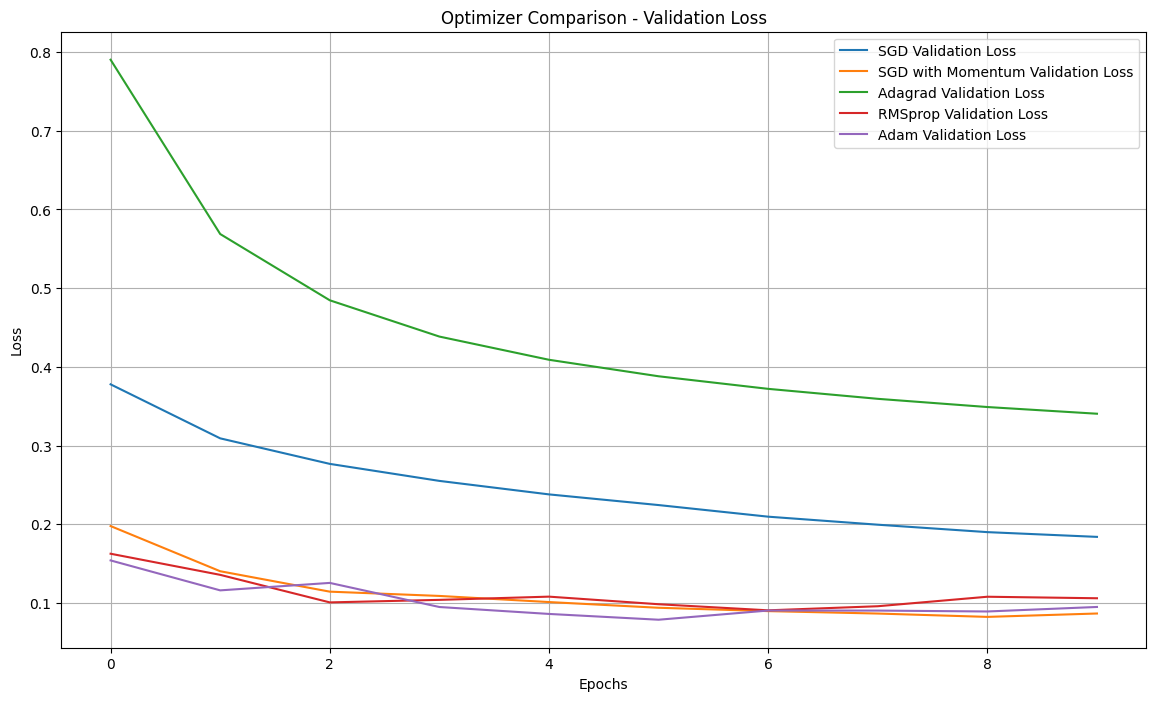

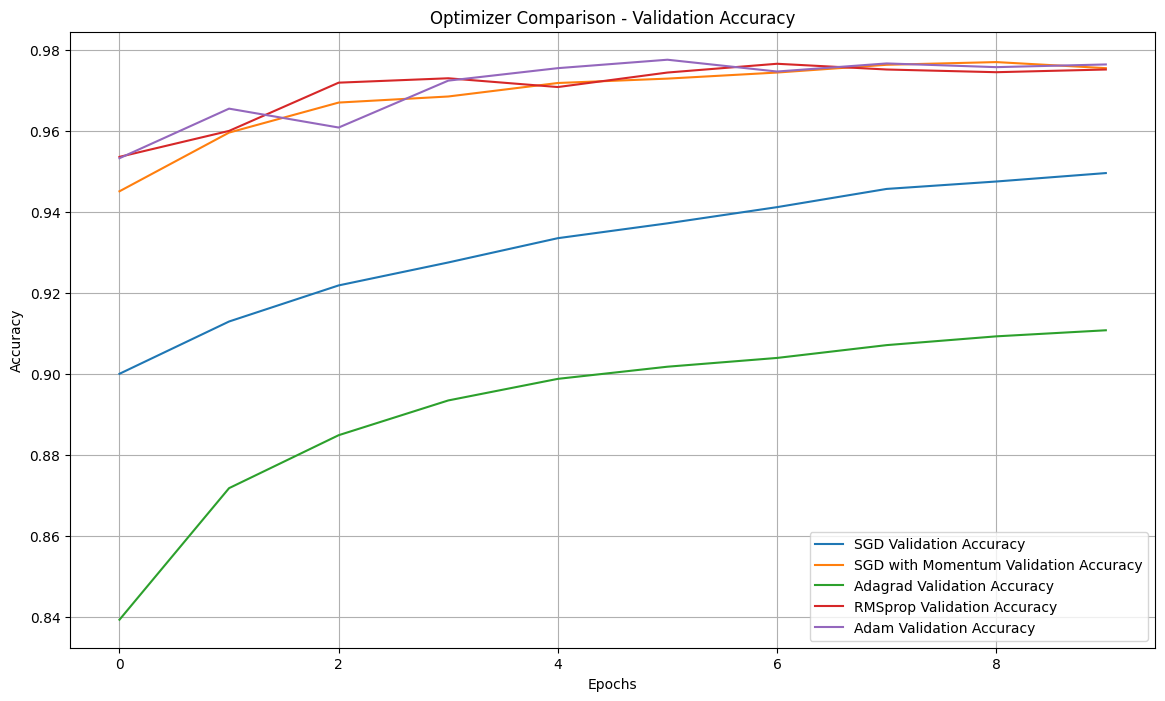

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define a simple feedforward neural network
def create_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# List of optimizers to compare
optimizers = {
    'SGD': SGD(),
    'SGD with Momentum': SGD(momentum=0.9),
        'Adagrad': Adagrad(),
    'RMSprop': RMSprop(),
    'Adam': Adam()
}

# Train and evaluate the model with each optimizer
history_dict = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name}...")
    model = create_model(optimizer)
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
    history_dict[name] = history

# Plot training loss and validation loss for each optimizer
plt.figure(figsize=(14, 8))
for name, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')
plt.title('Optimizer Comparison - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
for name, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')
plt.title('Optimizer Comparison - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
